In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import graphviz 

In [16]:
data=pd.read_csv("diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = data['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

### Decision tree

In [18]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter="random", random_state=30)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Decision Tree accuracy:', accuracy_score(y_test, y_pred))

Decision Tree accuracy: 0.7135416666666666


[Text(334.8, 380.52, 'X[7] <= 34.948\nentropy = 0.939\nsamples = 576\nvalue = [371, 205]'),
 Text(167.4, 271.8, 'X[1] <= 169.45\nentropy = 0.833\nsamples = 367\nvalue = [270, 97]'),
 Text(83.7, 163.07999999999998, 'X[1] <= 127.234\nentropy = 0.759\nsamples = 342\nvalue = [267, 75]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.563\nsamples = 265\nvalue = [230, 35]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.999\nsamples = 77\nvalue = [37, 40]'),
 Text(251.10000000000002, 163.07999999999998, 'X[4] <= 63.509\nentropy = 0.529\nsamples = 25\nvalue = [3, 22]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.672\nsamples = 17\nvalue = [3, 14]'),
 Text(502.20000000000005, 271.8, 'X[1] <= 130.485\nentropy = 0.999\nsamples = 209\nvalue = [101, 108]'),
 Text(418.5, 163.07999999999998, 'X[5] <= 24.763\nentropy = 0.954\nsamples = 107\nvalue = [67, 40]'),
 Text(376.65000000000003, 54.360000000000014

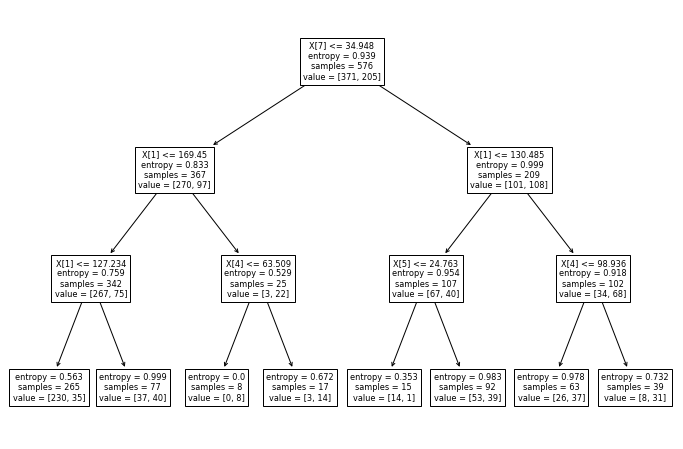

In [19]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(x_train, y_train)) 

In [20]:
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Glucose                        0.676820
 2) Age                            0.224575
 3) BMI                            0.053392
 4) Insulin                        0.045213
 5) DiabetesPedigreeFunction       0.000000
 6) SkinThickness                  0.000000
 7) BloodPressure                  0.000000
 8) Pregnancies                    0.000000


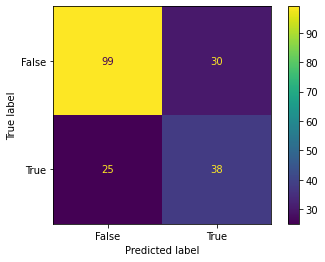

In [21]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

### Random Forest

In [22]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('random forest accuracy:', accuracy_score(y_test, y_pred))

random forest accuracy: 0.7395833333333334


In [23]:
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Glucose                        0.251432
 2) BMI                            0.157981
 3) Age                            0.145163
 4) DiabetesPedigreeFunction       0.135121
 5) BloodPressure                  0.090971
 6) Pregnancies                    0.077791
 7) Insulin                        0.071239
 8) SkinThickness                  0.070301


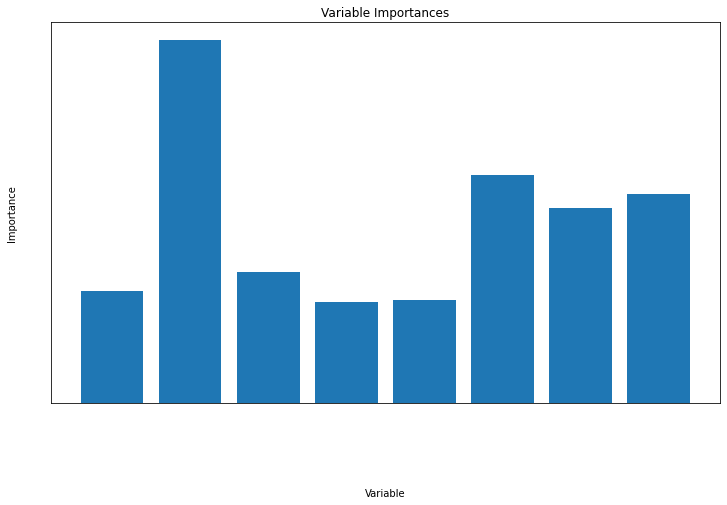

In [24]:
plt.figure(figsize=(12,7))
plt.tick_params(colors='white')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, list(data.columns)[0:8],rotation=30)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

## XG boost

In [25]:
xgb_model = XGBClassifier(eta=0.05, n_estimators=500, max_depth=3,scale_pos_weight=1.9)
xgb_model.fit(x_train,y_train) 
prediction=xgb_model.predict(x_test) 
print('XGboost accuracy:',accuracy_score(prediction,y_test))

[17:46:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost accuracy: 0.7395833333333334


In [26]:
importances = xgb_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Glucose                        0.315090
 2) Age                            0.129900
 3) BMI                            0.119912
 4) SkinThickness                  0.094146
 5) Pregnancies                    0.093824
 6) DiabetesPedigreeFunction       0.091187
 7) Insulin                        0.086399
 8) BloodPressure                  0.069543


<Figure size 360x360 with 0 Axes>

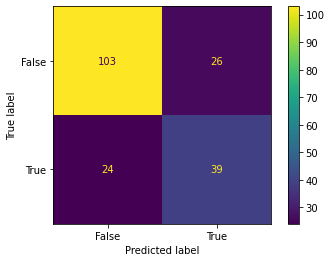

In [27]:
plt.figure(figsize=(5,5))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [28]:
from xgboost import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

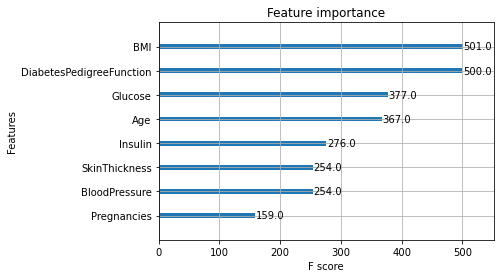

In [29]:
plot_importance(xgb_model)